In [1]:
import rasterio.plot
from rasterio.plot import show_hist
from tqdm import tqdm     # progress bar
import numpy as np
import matplotlib.patheffects as pe
import glob
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio


In [ ]:
# Create all shapefiles with different configuartions (commented parts)
import os
import numpy as np
import geopandas as gpd

# Load all the scores into a dictionary
data_dict = {
    'DS': np.load("ExplainedGradients/DS_shap_values_Xt.npy"),
    'DF': np.load("ExplainedGradients/DF_shap_values_Xt.npy"),
    'ES': np.load("ExplainedGradients/ES_shap_values_Xt.npy"),
    'EF': np.load("ExplainedGradients/EF_shap_values_Xt.npy"),
    'RS': np.load("ExplainedGradients/RS_shap_values_Xt.npy"),
    #'rain': np.load("Data/daily_rain.npy")
}

# Load the base GeoDataFrame from a shapefile using pyogrio
base_shapefile_path = "Data/su05_final.shp"
locations = gpd.read_file(base_shapefile_path, engine='pyogrio')

# Define the directory to save the shapefiles
output_dir = "Results_GIS"
os.makedirs(output_dir, exist_ok=True)

# Iterate over each landslide type (DS, DF, ES, EF, RS) and calculate cumulative scores
for landslide_type, scores_array in data_dict.items():
    if landslide_type == 'rain':  # Skip 'rain' key here and handle separately
        continue
    
    # Print the shape of the scores array to debug
    print(f"Processing {landslide_type}: original scores_array shape = {scores_array.shape}")
    
    # Squeeze the scores_array to remove any extra dimensions with size 1
    scores_array = np.squeeze(scores_array)
    
    # Print the new shape after squeezing
    print(f"Processing {landslide_type}: squeezed scores_array shape = {scores_array.shape}")
    
    # Check if the scores_array has the expected shape (num_locations, num_days)
    if scores_array.ndim != 2:
        raise ValueError(f"Unexpected shape for {landslide_type} after squeezing: {scores_array.shape}, expected 2 dimensions.")
    
    if scores_array.shape[0] != locations.shape[0]:
        raise ValueError(f"Mismatch in number of locations: {scores_array.shape[0]} in scores_array, {locations.shape[0]} in locations.")

    # Initialize an array to hold the cumulative scores
    cumulative_scores = np.zeros(scores_array.shape[0])  # Shape: (num_locations,)
    
    # Get the number of days
    num_days = scores_array.shape[1]  # Assuming shape is (num_locations, num_days)
    
    for day in range(num_days):
        # Print the shape of the current day scores to debug
        print(f"Day {day+1}: scores_array[:, {day}] shape = {scores_array[:, day].shape}")
        
        # Add the scores for the current day to the cumulative total
        cumulative_scores += scores_array[:, day]
        
        # Create a copy of the locations GeoDataFrame to avoid modifying the original
        locations_copy = locations.copy()
        
        # Add the cumulative scores for the current day as a new column
        #locations_copy[f'{landslide_type}_score_d'] = cumulative_scores # add cumulative 
        locations_copy[f'{landslide_type}_score_d'] = scores_array[:, day]
        
        # Define the output shapefile path for the cumulative scores
        output_shapefile_path = os.path.join(output_dir, f"{landslide_type}_SHAP_day{day+1}.shp") # add cumulaitve in case
        
        # Save the updated GeoDataFrame to a shapefile
        locations_copy.to_file(output_shapefile_path, driver="ESRI Shapefile", engine='pyogrio')

print(f"Cumulative scores shapefiles created and saved in {output_dir}")


# # Iterate over each landslide type (DS, DF, ES, EF, RS)
# for landslide_type, scores_array in data_dict.items():
#     if landslide_type == 'rain':  # Skip 'rain' key here and handle separately
#         continue
    
#     # Check if the scores_array matches the rainfall data in terms of number of days
#     num_days = scores_array.shape[1]  # Assuming shape is (num_locations, num_days)
    
#     for day in range(num_days):
#         # Create a copy of the locations GeoDataFrame to avoid modifying the original
#         locations_copy = locations.copy()
        
#         # Add the scores for the current day as a new column
#         locations_copy[f'{landslide_type}_day{day+1}'] = scores_array[:, day]
        
#         # Define the output shapefile path for the landslide scores
#         output_shapefile_path = os.path.join(output_dir, f"{landslide_type}_day{day+1}.shp")
        
#         # Save the updated GeoDataFrame to a shapefile
#         locations_copy.to_file(output_shapefile_path, driver="ESRI Shapefile", engine='pyogrio')



# # Handle rainfall data separately
# rainfall_data = data_dict['rain']
# num_days_rain = rainfall_data.shape[1]  # Assuming shape is (num_locations, num_days)

# for day in range(num_days_rain):
#     # Create a copy of the locations GeoDataFrame to avoid modifying the original
#     locations_copy = locations.copy()
    
#     # Add the rainfall data for the current day as a new column
#     locations_copy[f'rain_day{day+1}'] = rainfall_data[:, day]
    
#     # Define the output shapefile path for the rainfall data
#     output_shapefile_path = os.path.join(output_dir, f"rain_day{day+1}.shp")
    
#     # Save the updated GeoDataFrame to a shapefile
#     locations_copy.to_file(output_shapefile_path, driver="ESRI Shapefile", engine='pyogrio')



# # FOR cumulative rainfall each day
# rainfall_data = data_dict['rain']
# num_days_rain = rainfall_data.shape[1]  # Assuming shape is (num_locations, num_days)

# # Initialize an array to hold the cumulative rainfall values
# cumulative_rainfall = np.zeros(rainfall_data.shape[0])

# for day in range(num_days_rain):
#     # Add the rainfall for the current day to the cumulative total
#     cumulative_rainfall += rainfall_data[:, day]
    
#     # Create a copy of the locations GeoDataFrame to avoid modifying the original
#     locations_copy = locations.copy()
    
#     # Add the cumulative rainfall data for the current day as a new column
#     locations_copy[f'cumulative_rain_day{day+1}'] = cumulative_rainfall
    
#     # Define the output shapefile path for the cumulative rainfall data
#     output_shapefile_path = os.path.join(output_dir, f"cumulative_rain_day{day+1}.shp")
    
#     # Save the updated GeoDataFrame to a shapefile
#     locations_copy.to_file(output_shapefile_path, driver="ESRI Shapefile", engine='pyogrio')

# print(f"Cumulative rainfall shapefiles created and saved in {output_dir}")


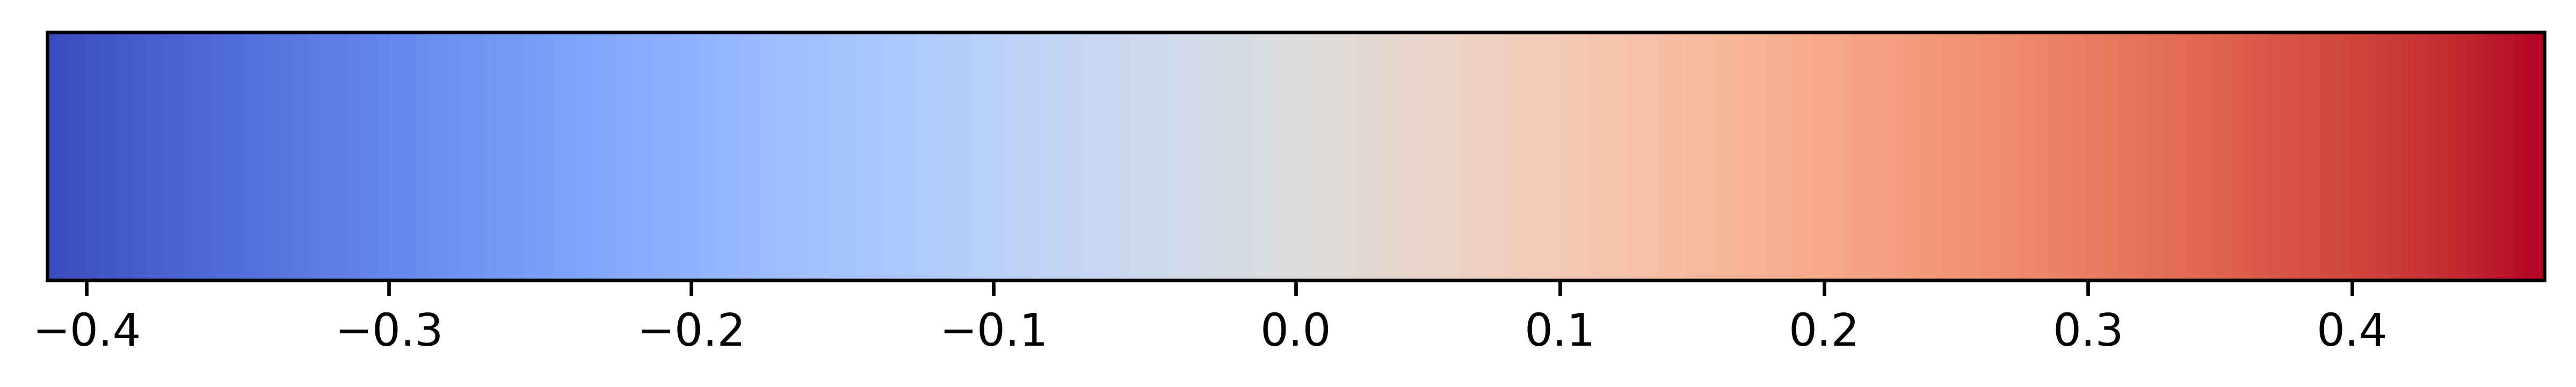

In [2]:
# prepare the data to be plotted with vmax and vmin of all landsldie values
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from matplotlib.colors import TwoSlopeNorm

# Define directories
shapefile_dir = "Results_GIS"
output_image_dir = "Shapefile_Images"
os.makedirs(output_image_dir, exist_ok=True)

# Define all landslide types
landslide_types = ["DS", "DF", "ES", "EF", "RS"]

# Collect all IG values across all shapefiles for all landslide types and days
all_score_values = []

for landslide_type in landslide_types:
    shapefiles = sorted(glob.glob(os.path.join(shapefile_dir, f"{landslide_type}_SHAP_day*.shp"))) #change SHAP in IG and viceversa 
    for shapefile in shapefiles:
        gdf = gpd.read_file(shapefile)
        column_name = f'{landslide_type}_score_d'  # Adjust!! if SHAP: _score_d, if IG: IG_day
        if column_name in gdf.columns:
            all_score_values.extend(gdf[column_name].dropna().values)

# Calculate global min and max for colormap limits
vmin = np.min(all_score_values)
vmax = np.max(all_score_values)

# Define colormap and normalization centered at 0
cmap = plt.get_cmap("coolwarm")
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Generate and save a reference color bar
# Adjust the color bar with symmetric ticks around 0
tick_values = np.arange(-0.5, 0.5, 0.1)  # for IG -2,2 , 1, 0.2
fig, ax = plt.subplots(figsize=(10, 1), dpi=600)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# Set the color bar with the specified ticks and label
cbar = fig.colorbar(sm, cax=ax, orientation='horizontal', ticks=tick_values)
#cbar.set_label("Integrated Gradients (IG) scores", fontsize=12)
plt.savefig(os.path.join(output_image_dir, "SHAP_scores_colorbar.png"), bbox_inches='tight')
plt.show()
plt.close()

In [3]:
#Plot IG/SHAP score with vmax and vmin of all landslide types calculated above
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from matplotlib.colors import TwoSlopeNorm

# Define directories
shapefile_dir = "Results_GIS"
output_image_dir = "Shapefile_Images"
os.makedirs(output_image_dir, exist_ok=True)

# Define all landslide types
landslide_types = ["RS"] #[DS, "DF", "ES", "EF", "RS"]

# Iterate over landslide types and their corresponding shapefiles for plotting
for landslide_type in landslide_types:
    shapefiles = sorted(glob.glob(os.path.join(shapefile_dir, f"{landslide_type}_SHAP_day*.shp")))
    for shapefile in shapefiles:
        gdf = gpd.read_file(shapefile)
        
        # Extract day number from filename
        day_str = shapefile.split('_day')[-1].split('.')[0]
        try:
            day_num = int(day_str)
        except ValueError:
            print(f"Error parsing day number from {shapefile}")
            continue
        
        # Invert day number for title
        inverted_day_num = 31 - day_num
        
        # Verify the column exists
        column_name = f'{landslide_type}_score_d'
        if column_name not in gdf.columns:
            print(f"Column {column_name} not found in {shapefile}")
            continue

        # Get the bounds of the shapefile to ensure consistent plotting boundaries
        shapefile_bounds = gdf.total_bounds  # Returns [xmin, ymin, xmax, ymax]

        # Plot each shapefile with consistent color scale
        fig, ax = plt.subplots(figsize=(12, 8), dpi=500)
        gdf.plot(column=column_name, ax=ax, cmap=cmap, norm=norm, legend=False)

        # Set the extent of the plot to match the shapefile bounds
        ax.set_xlim([shapefile_bounds[0], shapefile_bounds[2]])  # Set x-axis limits [xmin, xmax]
        ax.set_ylim([shapefile_bounds[1], shapefile_bounds[3]])  # Set y-axis limits [ymin, ymax]
        
        # Set title and remove axes for cleaner look
        #plt.title(f'{landslide_type} Day {inverted_day_num}', fontsize=10)
        ax.axis('off')
        
        # Save as high-quality image
        image_filename = os.path.join(output_image_dir, f"{landslide_type}_SHAP_day{day_str}.png")
        plt.savefig(image_filename, bbox_inches='tight', pad_inches=0, format='png')
        plt.close()

## old SHAP plotting 

In [3]:
# prepare colorscale for rainfall or landlsilde with for SHAP 

from matplotlib.colors import TwoSlopeNorm
import matplotlib.colors as mcolors
import os
import glob

# Define the directory containing the shapefiles
shapefile_dir = "Results_GIS"
output_image_dir = "Shapefile_Images"
os.makedirs(output_image_dir, exist_ok=True)

# Get all shapefiles for a specific landslide type, e.g., 'DS'
landslide_type = "rain"  # Change this for each landslide type
shapefiles = sorted(glob.glob(os.path.join(shapefile_dir, f"{landslide_type}_day*.shp")))
#shapefiles = sorted(glob.glob(os.path.join(shapefile_dir, f"{landslide_type}*.shp")))

# SELECT THE LANDSLIDE OR RAINFALL

# FOR LANDSLIDE SCORE
# Define the color map and normalization
#cmap = 'viridis'
#vmin, vmax = -100, 500  # Set the replacement values for outliers

## FOR RAINFALL
# Define the color map and normalization
vmin, vmax = 0, 250  # Set the limits for rainfall (0 to 250 mm for daily, 600 for cumulative)
# Custom colormap: dark grey for 0, light blue to dark blue for positive values
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_blue_grey_scale",
    [(0.0, "#a9a9a9"),  # Dark grey for zero values
     (0.01, "#add8e6"), # Light blue for small positive values
     (1.0, "#00008b")], # Dark blue for maximum value 
    N=75
)

In [ ]:
# rainfall with station as dots
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from pyproj import Transformer

# Load the station coordinates from the Excel file
excel_path = "Z:/GEOAPP_Synology/Lavori/Twente/Python_twente/precipitation_intervals.xlsx"
df_daily = pd.read_excel(excel_path, sheet_name="Daily", header=[0, 1, 2], index_col=0)

# Set up a transformer for lat/lon to UTM (assuming you're working with UTM Zone 32N)
transformer = Transformer.from_crs("epsg:4326", "epsg:32632", always_xy=True)

# Extract the latitude and longitude values, transform them to UTM, and store them in dictionaries
latitudes = {}
longitudes = {}

for station in df_daily.columns.levels[0]:
    lat = df_daily[station].columns.get_level_values('lat')[0]
    lon = df_daily[station].columns.get_level_values('lon')[0]
    
    # Transform to UTM
    utm_x, utm_y = transformer.transform(lon, lat)
    
    latitudes[station] = utm_y
    longitudes[station] = utm_x
    
# Define the directory containing the shapefiles
shapefile_dir = "Results_GIS"
output_image_dir = "Shapefile_Images"
os.makedirs(output_image_dir, exist_ok=True)

# Get all shapefiles for a specific landslide type, e.g., 'rain'
landslide_type = "rain"  # Change this for each landslide type
shapefiles = sorted(glob.glob(os.path.join(shapefile_dir, f"{landslide_type}_day*.shp")))

# Define the color map and normalization for rainfall
vmin, vmax = 0, 250  # Set the limits for rainfall (0 to 250 mm)

# Custom colormap: dark grey for 0, light blue to dark blue for positive values
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_blue_grey_scale",
    [(0.0, "#a9a9a9"),  # Dark grey for zero values
     (0.01, "#add8e6"), # Light blue for small positive values
     (1.0, "#00008b")], # Dark blue for maximum value (250 mm)
    N=100
)

# Iterate over each shapefile and save it as a high-quality image
for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    
    # Extract the day number from the filename
    day_str = shapefile.split('_day')[-1].split('.')[0]  # This extracts the day number as a string
    day_num = int(day_str)  # Convert the day number to an integer
    
    # Invert the day number for the title
    inverted_day_num = 31 - day_num
    
    # Construct the correct column name using the day number
    column_name = f'{landslide_type}_day{day_str}'
    
    if column_name not in gdf.columns:
        raise ValueError(f"Column {column_name} not found in the shapefile {shapefile}")
    
    # Replace outliers instead of clipping
    gdf[column_name] = np.where(gdf[column_name] < vmin, vmin, gdf[column_name])
    gdf[column_name] = np.where(gdf[column_name] > vmax, vmax, gdf[column_name])
    
    # Plot the GeoDataFrame with a high DPI and the custom colormap
    fig, ax = plt.subplots(figsize=(12, 8), dpi=500)
    
    # Plot the rain data without individual color bars
    gdf.plot(ax=ax, column=column_name, cmap=cmap, vmin=vmin, vmax=vmax, legend=False)
    
    # Plot the station points as black dots (without legend)
    plt.scatter(list(longitudes.values()), list(latitudes.values()), color='black', s=5, zorder=5)  # s=30 defines the size of the dots
    
    # Set the title with the inverted day number and remove axes for a cleaner look
    plt.title(f'{landslide_type} Day {inverted_day_num}', fontsize=10)
    ax.axis('off')
    
    # Save the plot as an image with a higher DPI
    image_filename = os.path.join(output_image_dir, f"{landslide_type}_day{day_str}.png")
    plt.savefig(image_filename, bbox_inches='tight')
    plt.close()

# Generate one final plot with the color bar to use as a reference
fig, ax = plt.subplots(figsize=(10, 1), dpi=400)
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=ax, orientation='horizontal')
cbar.set_label(f'{landslide_type} (mm of rain)', fontsize=12)
plt.savefig(os.path.join(output_image_dir, f"{landslide_type}_colorbar.png"), bbox_inches='tight')
plt.close()

In [ ]:
# SHAP plot for landslde or rainfall

import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np

# Iterate over each shapefile and save it as a high-quality TIFF image
for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    
    # Extract the day number from the filename
    day_str = shapefile.split('_day')[-1].split('.')[0]  # This extracts the day number as a string
    day_num = int(day_str)  # Convert the day number to an integer
    
    # Invert the day number for clarity
    inverted_day_num = 31 - day_num
    
    # Construct the correct column name using the day number
    #column_name = "cumulative"  # This for cumuative rainfall and landslide probability
    column_name = f'{landslide_type}_day{day_str}' # This for not cumulative

    # Debug: Check if the column exists
    if column_name not in gdf.columns:
        print(f"Column {column_name} not found in {shapefile}")
        continue
    
    # Debug: Check if the column contains any data
    print(f"Column {column_name} values:\n{gdf[column_name].head()}")

    # Check if the column contains valid data
    if gdf[column_name].isna().all():
        print(f"Column {column_name} contains only NaN values in {shapefile}")
        continue
    
    # Replace outliers instead of clipping
    gdf[column_name] = np.where(gdf[column_name] < vmin, vmin, gdf[column_name])
    gdf[column_name] = np.where(gdf[column_name] > vmax, vmax, gdf[column_name])
    
    # Get the bounds of the shapefile to ensure consistent plotting boundaries
    shapefile_bounds = gdf.total_bounds  # Returns [xmin, ymin, xmax, ymax]
    
    # Plot the GeoDataFrame without a title and with a high DPI and tight layout
    fig, ax = plt.subplots(figsize=(12, 8), dpi=500)
    
    # Plot the data without individual color bars
    gdf.plot(ax=ax, column=column_name, cmap=cmap, vmin=vmin, vmax=vmax, legend=False)
    
    # Set the extent of the plot to match the shapefile bounds
    ax.set_xlim([shapefile_bounds[0], shapefile_bounds[2]])  # Set x-axis limits [xmin, xmax]
    ax.set_ylim([shapefile_bounds[1], shapefile_bounds[3]])  # Set y-axis limits [ymin, ymax]
    
    # Remove the axes for a cleaner look
    ax.axis('off')
    
    # Save the plot as a TIFF image with tight layout and no padding
    image_filename = os.path.join(output_image_dir, f"{landslide_type}_day{day_str}.png")
    plt.savefig(image_filename, bbox_inches='tight', pad_inches=0, format='png')
    plt.close()

# Generate one final plot with the color bar to use as a reference
fig, ax = plt.subplots(figsize=(10, 1), dpi=500)
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the color bar
cbar = fig.colorbar(sm, cax=ax, orientation='horizontal')
cbar.set_label(f'{landslide_type} Rainfall (mm)', fontsize=12)

# Save the color bar plot as a TIFF file with tight layout and no padding
plt.savefig(os.path.join(output_image_dir, f"{landslide_type}_colorbar.png"), bbox_inches='tight', pad_inches=0, format='png')
plt.close()


In [ ]:
# FOR THE GIF

# output='Tanzania_cropsar.gif'
# with imageio.get_writer(output, mode='I',fps=5) as writer:
    
#     for file in tqdm(files):

#         image = imageio.imread(file)
#         writer.append_data(image)



# Define a function to extract the day number from the filename
def extract_day_number(filename):
    # Assuming filenames are like "DF_day1.png", "DF_day2.png", etc.
    day_str = os.path.basename(filename).split('_day')[-1].split('.')[0]  # Extract the day number as a string
    return int(day_str)  # Convert to integer for sorting

# Define the output GIF path
output_gif = f"{landslide_type}_animation.gif"

# Get all the image files
image_files = sorted(glob.glob(os.path.join(output_image_dir, f"{landslide_type}_day*.png")), key=extract_day_number)

# Create the GIF
with imageio.get_writer(output_gif, mode='I', fps=1) as writer:
    for image_file in tqdm(image_files):
        image = imageio.imread(image_file)
        writer.append_data(image)

print(f"GIF saved as {output_gif}")


In [ ]:
#FOR THE GIF

import imageio
import numpy as np
from PIL import Image
from tqdm import tqdm
import os

# Set the directory path for all input/output files
base_dir = "Z:/GEOAPP_Synology/Lavori/Twente/Python_twente/ashokdahal-TransformerLandslide-23fdcf6/Shapefile_Images"

# File paths for the input GIFs and the legend images
landslide_gif = os.path.join(base_dir, 'RS_animation.gif')  # Landslide GIF (e.g., DF)
rain_gif = os.path.join(base_dir, 'cumulative_rain_animation.gif')  # Rainfall GIF
landslide_legend = os.path.join(base_dir, 'RS_colorbar.png')  # Legend for the landslide scores
rain_legend = os.path.join(base_dir, 'cumulative_rain_colorbar.png')  # Legend for the rain

# Output GIF file path
output_combined_gif = os.path.join(base_dir, 'combined_RS_cum_rain.gif')

# Load the legend images
landslide_legend_img = Image.open(landslide_legend)
rain_legend_img = Image.open(rain_legend)

# Resize legends to 1.5 times their original width and height
scale_factor = 1.4
max_legend_width = int(max(landslide_legend_img.width, rain_legend_img.width) * scale_factor)
legend_height = int(max(landslide_legend_img.height, rain_legend_img.height) * scale_factor)

landslide_legend_img = landslide_legend_img.resize((max_legend_width, legend_height))
rain_legend_img = rain_legend_img.resize((max_legend_width, legend_height))

# Concatenate the legends horizontally
combined_legend = Image.new('RGB', (max_legend_width * 2, legend_height))
combined_legend.paste(landslide_legend_img, (0, 0))
combined_legend.paste(rain_legend_img, (max_legend_width, 0))

# Open the landslide and rainfall GIFs and combine the frames
with imageio.get_reader(landslide_gif) as landslide_reader, \
     imageio.get_reader(rain_gif) as rain_reader, \
     imageio.get_writer(output_combined_gif, mode='I', fps=1) as writer:

    # Ensure both GIFs have the same number of frames
    num_frames = min(len(landslide_reader), len(rain_reader))

    for i in tqdm(range(num_frames)):
        # Read the corresponding frame from both GIFs
        landslide_frame = Image.fromarray(landslide_reader.get_data(i))
        rain_frame = Image.fromarray(rain_reader.get_data(i))

        # Resize both frames to the same height (use the smaller height)
        frame_height = min(landslide_frame.height, rain_frame.height)
        landslide_frame = landslide_frame.resize((landslide_frame.width, frame_height))
        rain_frame = rain_frame.resize((rain_frame.width, frame_height))

        # Combine the two frames side by side
        combined_frame = Image.new('RGB', (landslide_frame.width + rain_frame.width, frame_height))
        combined_frame.paste(landslide_frame, (0, 0))
        combined_frame.paste(rain_frame, (landslide_frame.width, 0))

        # Create a new image with the combined frame and the larger legends below
        final_image_height = combined_frame.height + combined_legend.height
        final_image = Image.new('RGB', (combined_frame.width, final_image_height))
        final_image.paste(combined_frame, (0, 0))
        final_image.paste(combined_legend, (0, combined_frame.height))

        # Append the frame to the output GIF
        writer.append_data(np.array(final_image))

print(f"Combined GIF saved as {output_combined_gif}")
